In [741]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
plt.rcParams['figure.figsize']= (5.0, 7.0)

In [742]:
df = pd.read_csv('titanic.csv')

In [743]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [744]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [746]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [747]:
df.shape

(891, 12)

In [748]:
df= df.drop(['Cabin'],axis=1)
df= df.drop(['PassengerId'],axis=1)
df= df.drop(['Name'],axis=1)
df= df.drop(['Ticket'],axis=1)

In [749]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# HANDLING OF MISSING VALUES
- REPLACE NUMERIC WITH MEDIAN
- REPLACE CATEGORICAL WITH MODE

In [750]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [751]:
median_value =df['Age'].median()
df['Age']= df['Age'].fillna(median_value)

In [752]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [753]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [754]:
df['Embarked']= df['Embarked'].fillna('S')

In [755]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# HANDLING DUPLICATES

In [756]:
len_before = df.shape[0]
df.drop_duplicates(inplace=True)
len_after = df.shape[0]

print(f"Before ={len_before}")
print(f"After = {len_after}")
print("")
print(f"Total Remove = {len_before - len_after}")

Before =891
After = 775

Total Remove = 116


In [757]:
## NEW shape of the dataset after removing after removing the Duplicates
df.shape

(775, 8)

In [758]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# HANDLING OF OUTLIER USING
- BOXPLOT

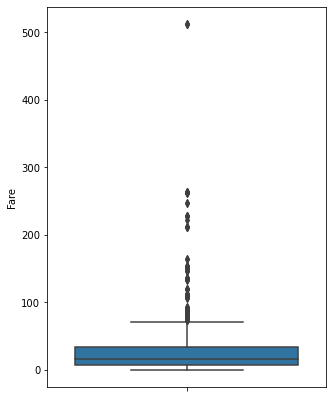

(<AxesSubplot:ylabel='Fare'>, None)

In [759]:
sns.boxplot(y=df['Fare']), plt.show()

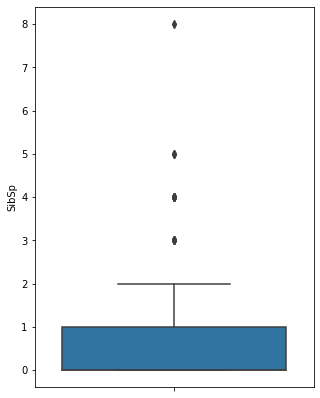

(<AxesSubplot:ylabel='SibSp'>, None)

In [760]:
sns.boxplot(y=df['SibSp']), plt.show()

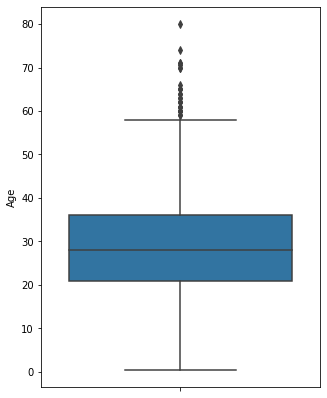

(<AxesSubplot:ylabel='Age'>, None)

In [761]:
sns.boxplot(y=df['Age']), plt.show()

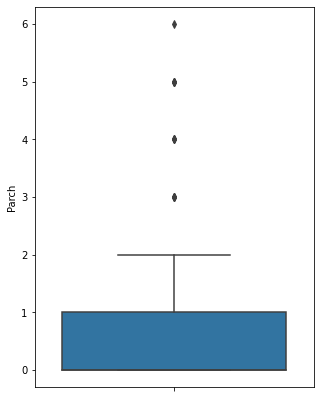

(<AxesSubplot:ylabel='Parch'>, None)

In [762]:
sns.boxplot(y=df['Parch']), plt.show()

# IDENTIFYING THE OUTLIERS AND REMOVING IT USING IQR

In [763]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Survived     1.0000
Pclass       2.0000
Age         15.0000
SibSp        1.0000
Parch        1.0000
Fare        26.1479
dtype: float64


In [764]:
print(df<(Q1-1.5*IQR)) or (df>(Q3+1.5*IQR))

       Age  Embarked   Fare  Parch  Pclass    Sex  SibSp  Survived
0    False     False  False  False   False  False  False     False
1    False     False  False  False   False  False  False     False
2    False     False  False  False   False  False  False     False
3    False     False  False  False   False  False  False     False
4    False     False  False  False   False  False  False     False
..     ...       ...    ...    ...     ...    ...    ...       ...
885  False     False  False  False   False  False  False     False
887  False     False  False  False   False  False  False     False
888  False     False  False  False   False  False  False     False
889  False     False  False  False   False  False  False     False
890  False     False  False  False   False  False  False     False

[775 rows x 8 columns]


,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
885,False,False,False,True,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False


In [765]:
df_before= df.shape
print(df_before)
df_clean= df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR))).any(axis=1)]
df_after =df_clean.shape
print(df_after)

(775, 8)
(601, 8)


In [766]:
df_clean.shape

(601, 8)

# ANALYZING THE DATASET USING VISUALIZATION

CHECKING THE DATASET TO IDENTIFY IF THERE IS ANY RELATIONSHIPS BETWEEN THE VARIABLES USING HEATMAP

Text(0.5, 1.0, 'Pearson correlation of Features')

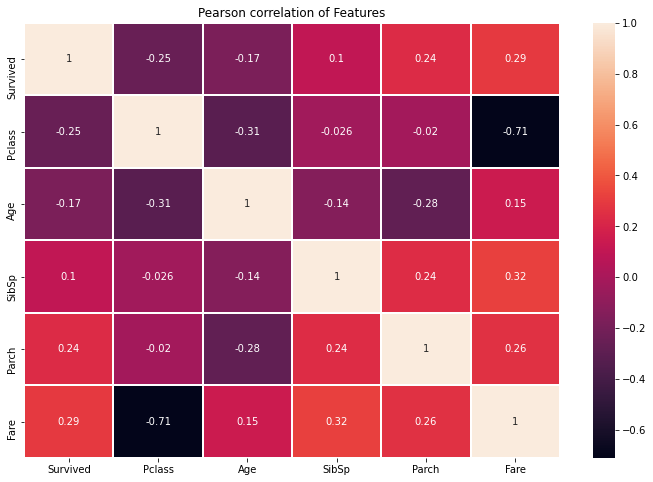

In [767]:
corr=df_clean.corr()
f, ax= plt.subplots(figsize=(12,8))
sns.heatmap(corr, annot=True, square=False, ax=ax, linewidth=1)
plt.title('Pearson correlation of Features')

<AxesSubplot:xlabel='Survived', ylabel='count'>

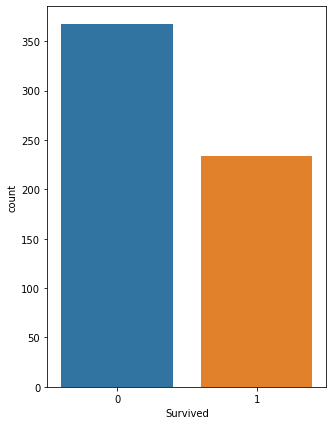

In [768]:
sns.countplot(x ='Survived', data=df_clean)

<AxesSubplot:xlabel='Survived', ylabel='count'>

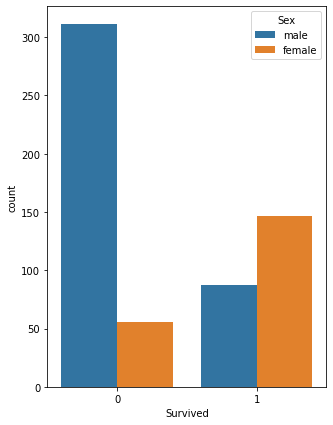

In [769]:
sns.countplot(x="Survived", hue ="Sex",data=df_clean)

<AxesSubplot:xlabel='Survived', ylabel='count'>

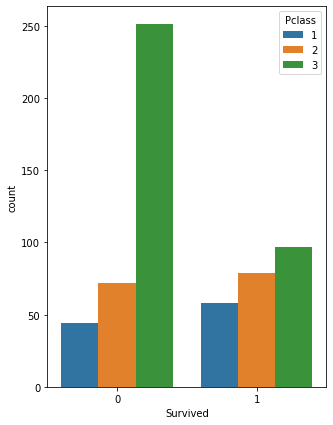

In [770]:
sns.countplot(x="Survived", hue= "Pclass", data=df_clean)

<AxesSubplot:xlabel='Survived', ylabel='count'>

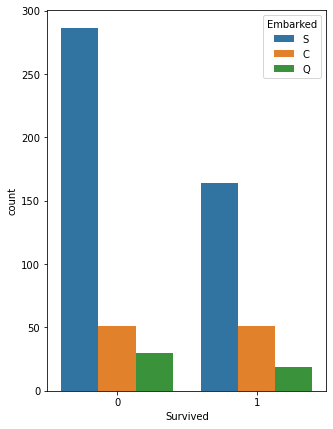

In [771]:
sns.countplot(x="Survived", hue= "Embarked", data=df_clean)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

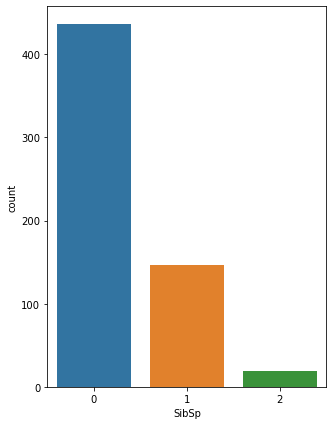

In [772]:
sns.countplot(x="SibSp", data=df_clean)

<AxesSubplot:ylabel='Frequency'>

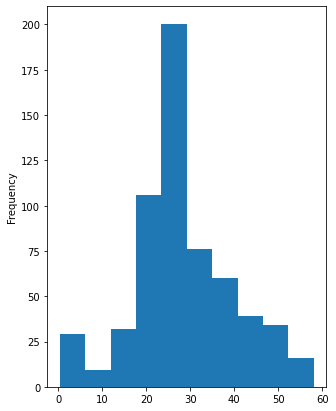

In [773]:
df_clean["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

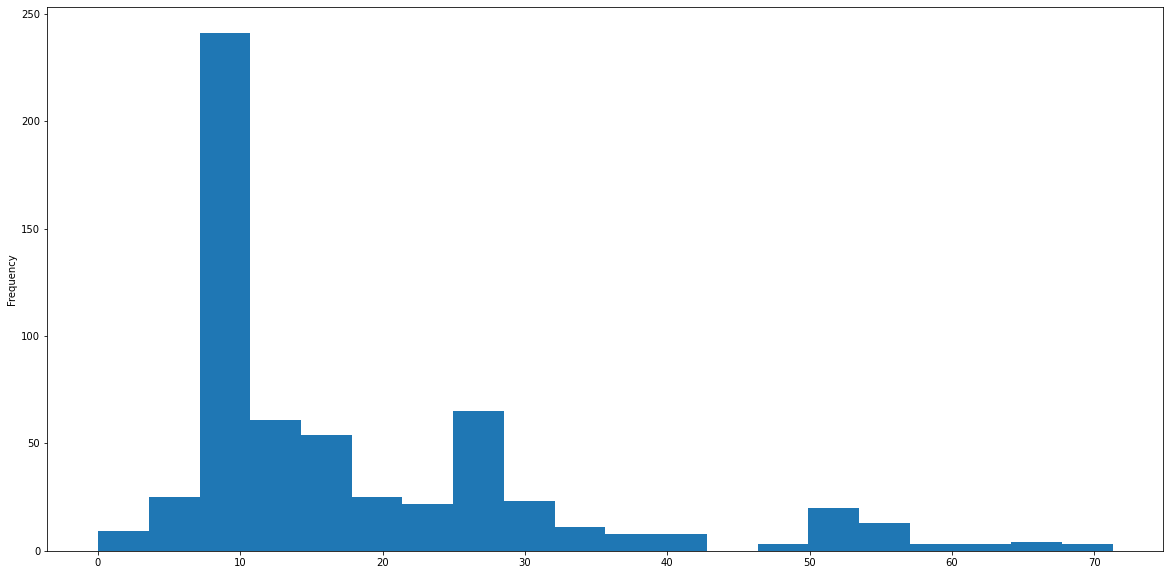

In [774]:
df_clean["Fare"].plot.hist(bins=20, figsize =(20,10))

In [775]:
df_clean.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.389351,2.409318,28.509151,0.306156,0.252912,18.213006
std,0.488009,0.763007,11.338211,0.525464,0.559103,14.351223
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,34.000000,1.000000,0.000000,26.000000
max,1.000000,3.000000,58.000000,2.000000,2.000000,71.283300


# Ecoding: Converting the Categorical columns into a Numerical

In [776]:
df_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [777]:
sex= pd.get_dummies(df_clean['Sex'])
sex.head(4)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0


In [778]:
Embarked=pd.get_dummies(df_clean['Embarked'], drop_first= True)
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [779]:
Pclass = pd.get_dummies(df_clean['Pclass'], drop_first= True)
Pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [780]:
df_clean2 =pd.concat([df_clean,sex,Pclass,Embarked], axis =1)

In [781]:
df_clean2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,2,3,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,1,0,1


In [782]:
df_clean2["female"].value_counts()

0    398
1    203
Name: female, dtype: int64

In [783]:
df_clean2.drop(["Sex","Pclass","Embarked"], axis=1, inplace=True)

In [784]:
df_clean2.head()

,Survived,Age,SibSp,Parch,Fare,female,male,2,3,Q,S
0,0,22.0,1,0,7.2500,0,1,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,1,0,1


# Training and Testing data

In [785]:
## Defining x and Y variables
x= df_clean2.drop('Survived',axis = 1).values
y= df_clean2['Survived'].values

In [786]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# scaling the dataset

In [787]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc

StandardScaler()

In [788]:
df_clean2["Age"]= sc.fit_transform(df_clean2[["Age"]])
df_clean2["Fare"]= sc.fit_transform(df_clean2[["Fare"]])

In [789]:
df_clean2.head()

,Survived,Age,SibSp,Parch,Fare,female,male,2,3,Q,S
0,0,-0.574568,1,0,-0.764544,0,1,0,1,0,1
1,1,0.837765,1,0,3.701044,1,0,0,0,0,0
2,1,-0.221485,0,0,-0.717470,1,0,0,1,0,1
3,1,0.572952,1,0,2.432967,1,0,0,0,0,1
4,0,0.572952,0,0,-0.708753,0,1,0,1,0,1


In [812]:
feature_name=df_clean2.columns[1:10]
feature_name

Index(['Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 2, 3, 'Q'], dtype='object')

# TRAINING THE MODELS
- LOGISTIC REGRESSION
- DECISION TREE
- RANDOM FOREST

# LOGISTICS REGRESSION

In [790]:

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

D:\Anaconda new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [791]:
LR.score(x_test,y_test)

0.7348066298342542

In [792]:
prediction = LR.predict(x_test)

In [793]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[81, 25],
       [23, 52]], dtype=int64)

In [794]:
from sklearn.metrics import classification_report
print("Classification report - \n", classification_report(y_test,prediction))

Classification report - 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       106
           1       0.68      0.69      0.68        75

    accuracy                           0.73       181
   macro avg       0.73      0.73      0.73       181
weighted avg       0.74      0.73      0.74       181



In [795]:
# Model Accuracy, how often is the LOGISTIC correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7403314917127072


# DECISION TREE MODEL

In [796]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [797]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [798]:
# Predicting the values of test data
y_pred = dtree.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.73      0.78      0.76       106
           1       0.66      0.60      0.63        75

    accuracy                           0.71       181
   macro avg       0.70      0.69      0.69       181
weighted avg       0.70      0.71      0.70       181



In [799]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7071823204419889


In [800]:
confusion_matrix(y_test,y_pred)

array([[83, 23],
       [30, 45]], dtype=int64)

# Optimizing Decision Tree Performance

In [801]:
dtree=DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [802]:
y_pred = dtree.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       106
           1       0.77      0.72      0.74        75

    accuracy                           0.80       181
   macro avg       0.79      0.78      0.79       181
weighted avg       0.79      0.80      0.79       181



In [803]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7955801104972375


In [804]:
#for visualizing tree 
from sklearn.tree import plot_tree

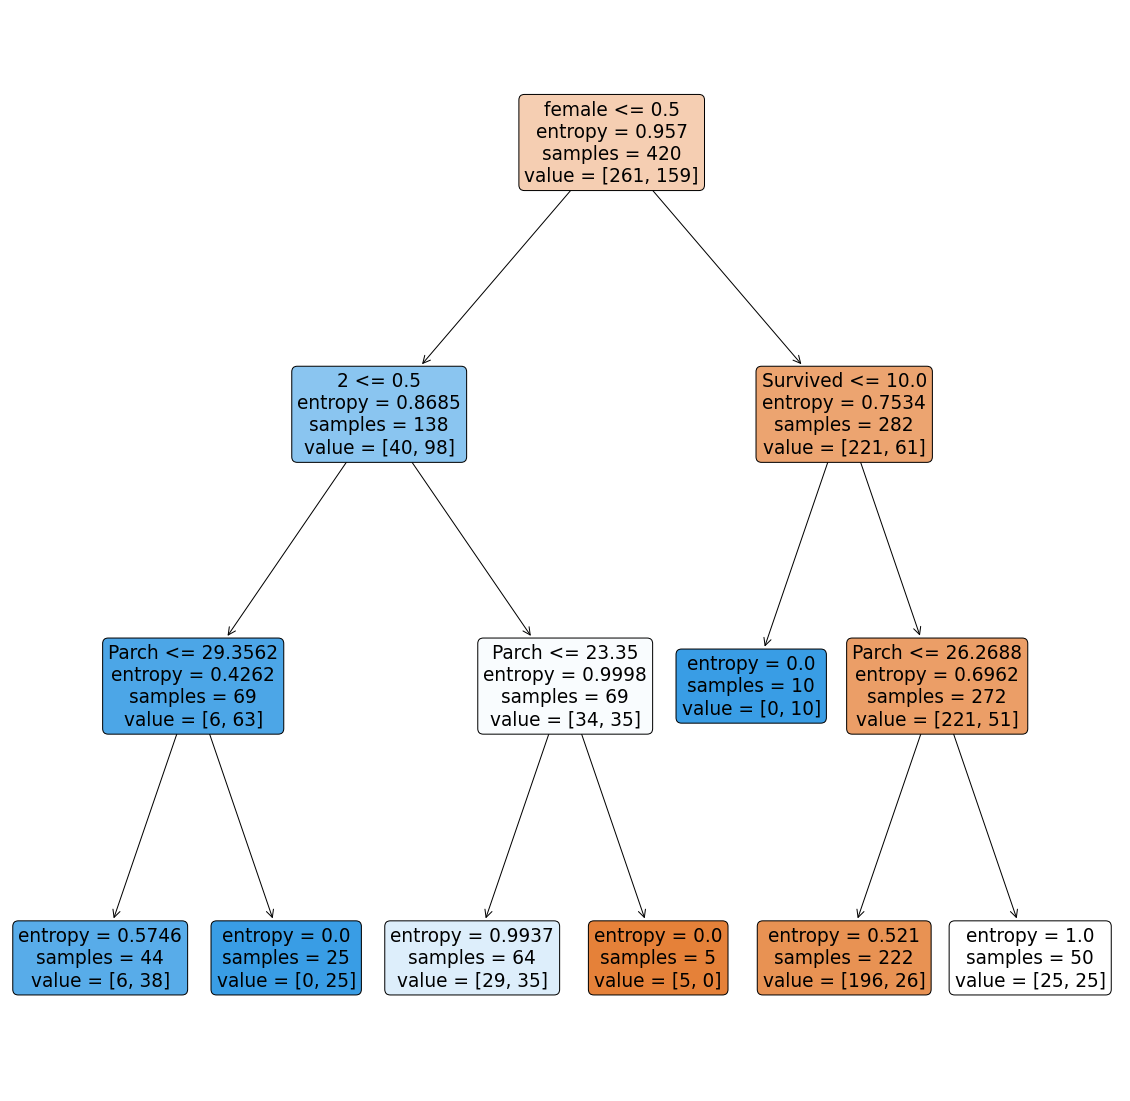

In [805]:
# Visualising the graph without the use of graphviz

plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df_clean2.columns, 
                 filled = True , precision = 4, rounded = True)

plt.savefig("one.png")

# RANDOM FOREST MODEL

In [806]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RFC=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=RFC.predict(X_test)
RFC.fit(x_train,y_train)

y_pred=RFC.predict(x_test)

In [807]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7569060773480663
